Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file.

In [2]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()

Make a PMF of <tt>numkdhh</tt>, the number of children under 18 in the respondent's household.

In [15]:
import thinkstats2
import thinkplot

resp.numkdhh.head(5)
pmf = thinkstats2.Pmf(resp.numkdhh, label='num children')

Display the PMF.

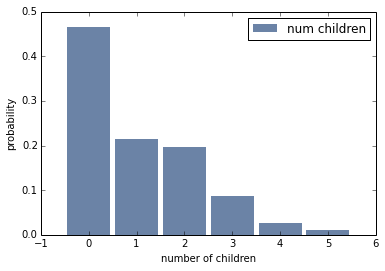

In [16]:
thinkplot.PrePlot(1)
thinkplot.hist(pmf)
thinkplot.show(xlabel='number of children', ylabel='probability')

Define <tt>BiasPmf</tt>.

In [17]:
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

Make a the biased Pmf of children in the household, as observed if you surveyed the children instead of the respondents.

In [18]:
biased_pmf = BiasPmf(pmf, 'biased num children')

Display the actual Pmf and the biased Pmf on the same axes.

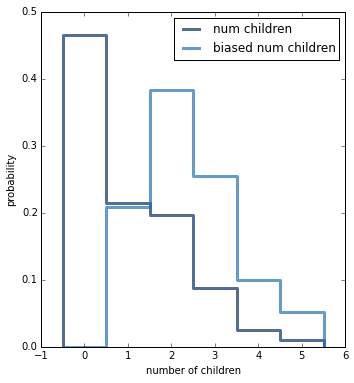

In [20]:
thinkplot.PrePlot(2, cols=2)
thinkplot.pmfs([pmf, biased_pmf])
thinkplot.show(xlabel='number of children', ylabel='probability')

Compute the means of the two Pmfs.

In [23]:
print "unbiased mean", pmf.Mean()
print "biased mean", biased_pmf.Mean()

unbiased mean 1.02420515504
biased mean 2.40367910066


## Ex 3.2

Computing the mean and variance of a PMF.

In [24]:
def PmfMean(pmf):
    """Computes the mean of a PMF
    Args:
        pmf: a Pmf object.
    Returns:
        floating point mean of the pmf
    """
    total = 0.0
    for val, prob in pmf.Items():
        total += val * prob
    return total

In [26]:
print "DIY unbiased mean", PmfMean(pmf)
print "DIY biased mean", PmfMean(biased_pmf)

DIY unbiased mean 1.02420515504
DIY biased mean 2.40367910066


In [27]:
import math

def PmfVariance(pmf):
    """Computes the variance of a PMF
    Args:
        pmf: a Pmf object
    Returns:
        floating point variance of the PMF
    """
    mean = PmfMean(pmf)
    total = 0.0
    for val, prob in pmf.Items():
        diff = mean - val
        total += prob * math.pow(diff, 2)
    return total

In [31]:
print "unbiased variance", pmf.Var()
print "biased varaince", biased_pmf.Var()
print "DIY unbiased variance", PmfVariance(pmf)
print "DIY biased variance", PmfVariance(biased_pmf)

unbiased variance 1.41286432635
biased varaince 1.17327210551
DIY unbiased variance 1.41286432635
DIY biased variance 1.17327210551


## Ex 3.3

Pairwise comparison of pregnancy lengths. Ie, for an individual woman with 2+ pregnancies, what was the average difference between the length of the first pregnancy and the others?

In [81]:
import nsfg

preg = nsfg.ReadFemPreg()

In [85]:
live = preg[preg.outcome == 1]
live = live[live.prglngth >= 37]
preg_map = nsfg.MakePregMap(live)

diffs = []
for caseid in preg_map:
    indices = preg_map[caseid]
    if len(indices) >= 2:
        first = live.loc[(live.caseid == caseid) & (live.pregordr == 1), 'prglngth']
        others = live.loc[(live.caseid == caseid) & (live.pregordr != 1), 'prglngth']
        if len(first) > 0:
            #print caseid, len(others)
            #print "first", first, type(first), type(first)
            for o in others:
                #print "o", o, type(o)
                #print "diff is", first - o
                diffs.append(first.iloc[0] - o)
diff_mean = thinkstats2.Mean(diffs)
print "average difference in length between first pregnancy and others: ", diff_mean

average difference in length between first pregnancy and others:  0.168286959437
